# Data Science Hands-on

**First day**     

At the end of this day we 
- Explore our dataset
- Make some plots to check different variables
- Select interesting features to apply ML algorithms
- Fill missing values
- Transform some feature to more infomative variables

[Pandas cheatsheet](https://github.com/creyesp/houses-project/blob/add-binder-configs/pandas_cheatsheet.md)


## What are some questions that I can answer with this dataset?
Understand your dataset is the fist step of any datascience project. You need to know the limitations and make a list of posible question that could be answering with this dataset. These question can reduce, expande or modify the scope of our project.

examples: 
- We could have great ideas but poor data
- We could have incorect question for our dataset
- We could have a rich dataset ....

**Data**: 
- We have a set of features of houses for sale in a specific time windows.  

**Business question/objective**:
- **New infocasas functionality**: Is it possible to offer an estimated price for selling given house characteristics (uploaded by owner in the webpage) without asking an appraiser? 


# Exploratory data analysis
- How many rows are in our dataset?
- How many columns are in our dataset?
- What data types are in the columns?
- are there missing values in the dataset? Do we infer missing values? how?
- are there outlier values? 

Data types:
- **Numeric**:
    - *Discrete*: variables that have finite posible values.
    - *Continuous*:  variables that can have an infinite number of possible values
- **Categorical, variables that have 2 or more possible values**:
    - *Ordinal*: these values have a meaningful order or rank. Ex. marks, A, B, C
    - *Nominal*: the order of those values have no meaning. Ex, names
    - *Binary or Dichotomous*: only 2 posible values, 1/0
- **Unstructured**:
    - *text*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom module
import handson

%matplotlib notebook

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None


## Load dataset


In [2]:
url_dataset = 'http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
col_name = ['sex', 'length', 'diameter', 'height', 'whole_weight',
            'shucked_weight', 'viscera_weight', 'shell_weight', 'rings', ]
df = pd.read_csv(url_dataset, names=col_name)

## General information about our dataset

In [4]:
# Look at the first 5 row of our dataset
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


In [3]:
# Check the neme of columns (features)
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [5]:
# Get number of rows and columns
df.shape

(4177, 9)

In [6]:
# Get data types of columns
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [7]:
# Check if there are missing values in each columns
df.isnull().any()

sex               False
length            False
diameter          False
height            False
whole_weight      False
shucked_weight    False
viscera_weight    False
shell_weight      False
rings             False
dtype: bool

In [8]:
# Get percentage of missing values from each columns
df.notnull().sum() / df.shape[0] * 100

sex              100.00
length           100.00
diameter         100.00
height           100.00
whole_weight     100.00
shucked_weight   100.00
viscera_weight   100.00
shell_weight     100.00
rings            100.00
dtype: float64

In [9]:
# Get number of unique values for each feature
df.nunique()

sex                  3
length             134
diameter           111
height              51
whole_weight      2429
shucked_weight    1515
viscera_weight     880
shell_weight       926
rings               28
dtype: int64

## Statistic resume
### Numeric variables
Look at statistic info for each columns and check which columns has unusual behavior. 
- Are all positive values?
- is standard deviation different to zero?
- How long is percetil 75 from max?

In [10]:
# Get a resume of numerical columns from our dataset
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,11.00
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,29.00


In [11]:
df.quantile([0.01, 0.95]).transpose()

,0.01,0.95
length,0.20,0.69
diameter,0.14,0.55
height,0.04,0.20
whole_weight,0.04,1.69
shucked_weight,0.01,0.74
viscera_weight,0.01,0.38
shell_weight,0.01,0.48
rings,4.00,16.00


### Categeries resume

In [12]:
# Get a resume of no numerical columns from our dataset. 
# Hint: use include='O' as argument in resume function

df.describe(include='O')

,sex
count,4177
unique,3
top,M
freq,1528



## Visualization
[Seaborn](https://seaborn.pydata.org/) is a very useful package to make EDA (built on [Matplotlib](https://matplotlib.org/)), it's a statistical data visualization package and it's easy to create univarible and bivarible plots.
<img src="img/seaborn.png" />

### Univarible plots
- Distribution
- Histograms
- Boxplots


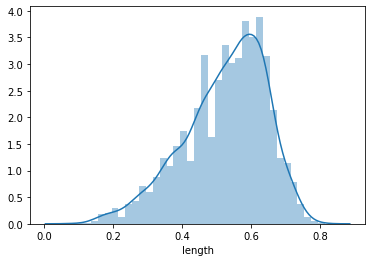

In [14]:
# Plot price distribution
f, ax = plt.subplots()
sns.distplot(df['length'], ax=ax)


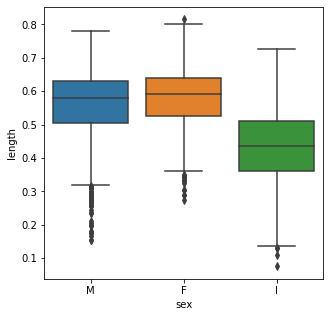

In [20]:
# Plot boxplots of price grop by some categorical feature 
# ex. estado, barrio, banos, dormitorios, tipo_propiedad

f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='sex', y='length', data=df)


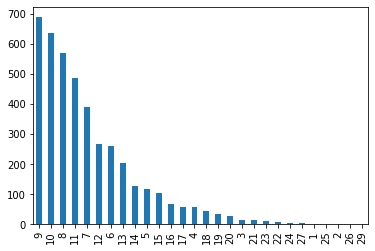

In [21]:
# Plot histogram of barrio feature
f, ax = plt.subplots()
df['rings'].value_counts().plot(kind='bar', ax=ax)


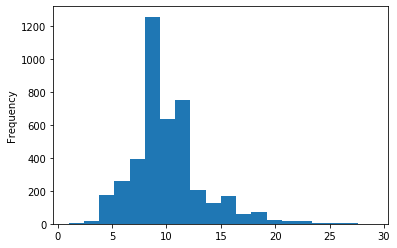

In [35]:
# Make a histogram of "ano_de_construccion" between 1880 and 2019, in bins of 10 years
f, ax = plt.subplots()
df['rings'].plot.hist(bins=20, ax=ax)


### bivarible plots
- Scatter
- Pairplot

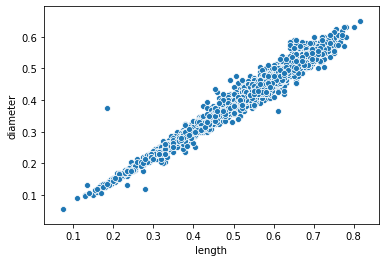

In [29]:
f, ax = plt.subplots()
sns.scatterplot(x='length', y='diameter', data=df, ax=ax)

In [31]:
df['diameter'].nlargest(10)

1428   0.65
1209   0.63
1763   0.63
2334   0.63
1207   0.62
1762   0.62
3008   0.61
1427   0.61
1985   0.60
3427   0.60
Name: diameter, dtype: float64

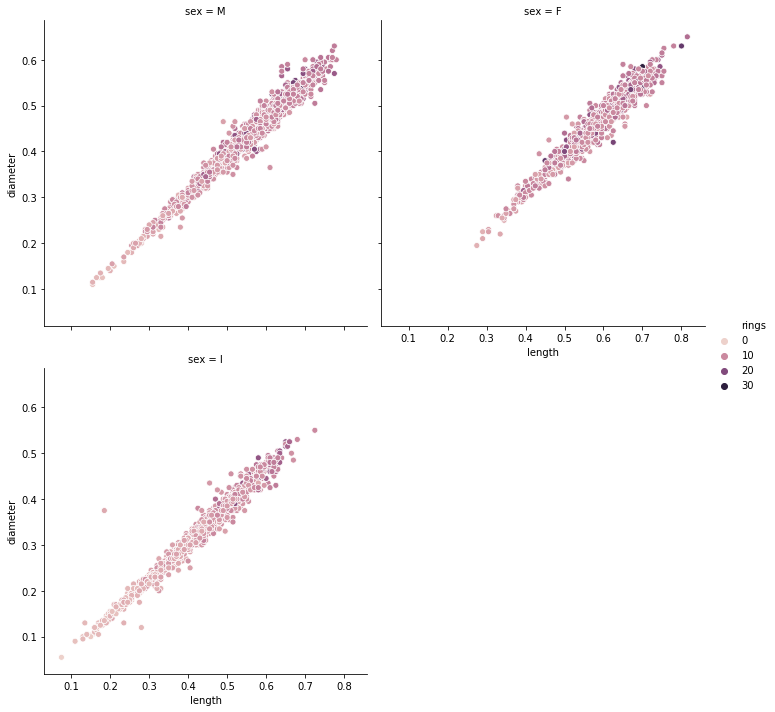

In [33]:
sns.relplot(
    x="length", 
    y="diameter",
    col="sex",
    col_wrap=2,
    hue='rings',
    data=df,

)

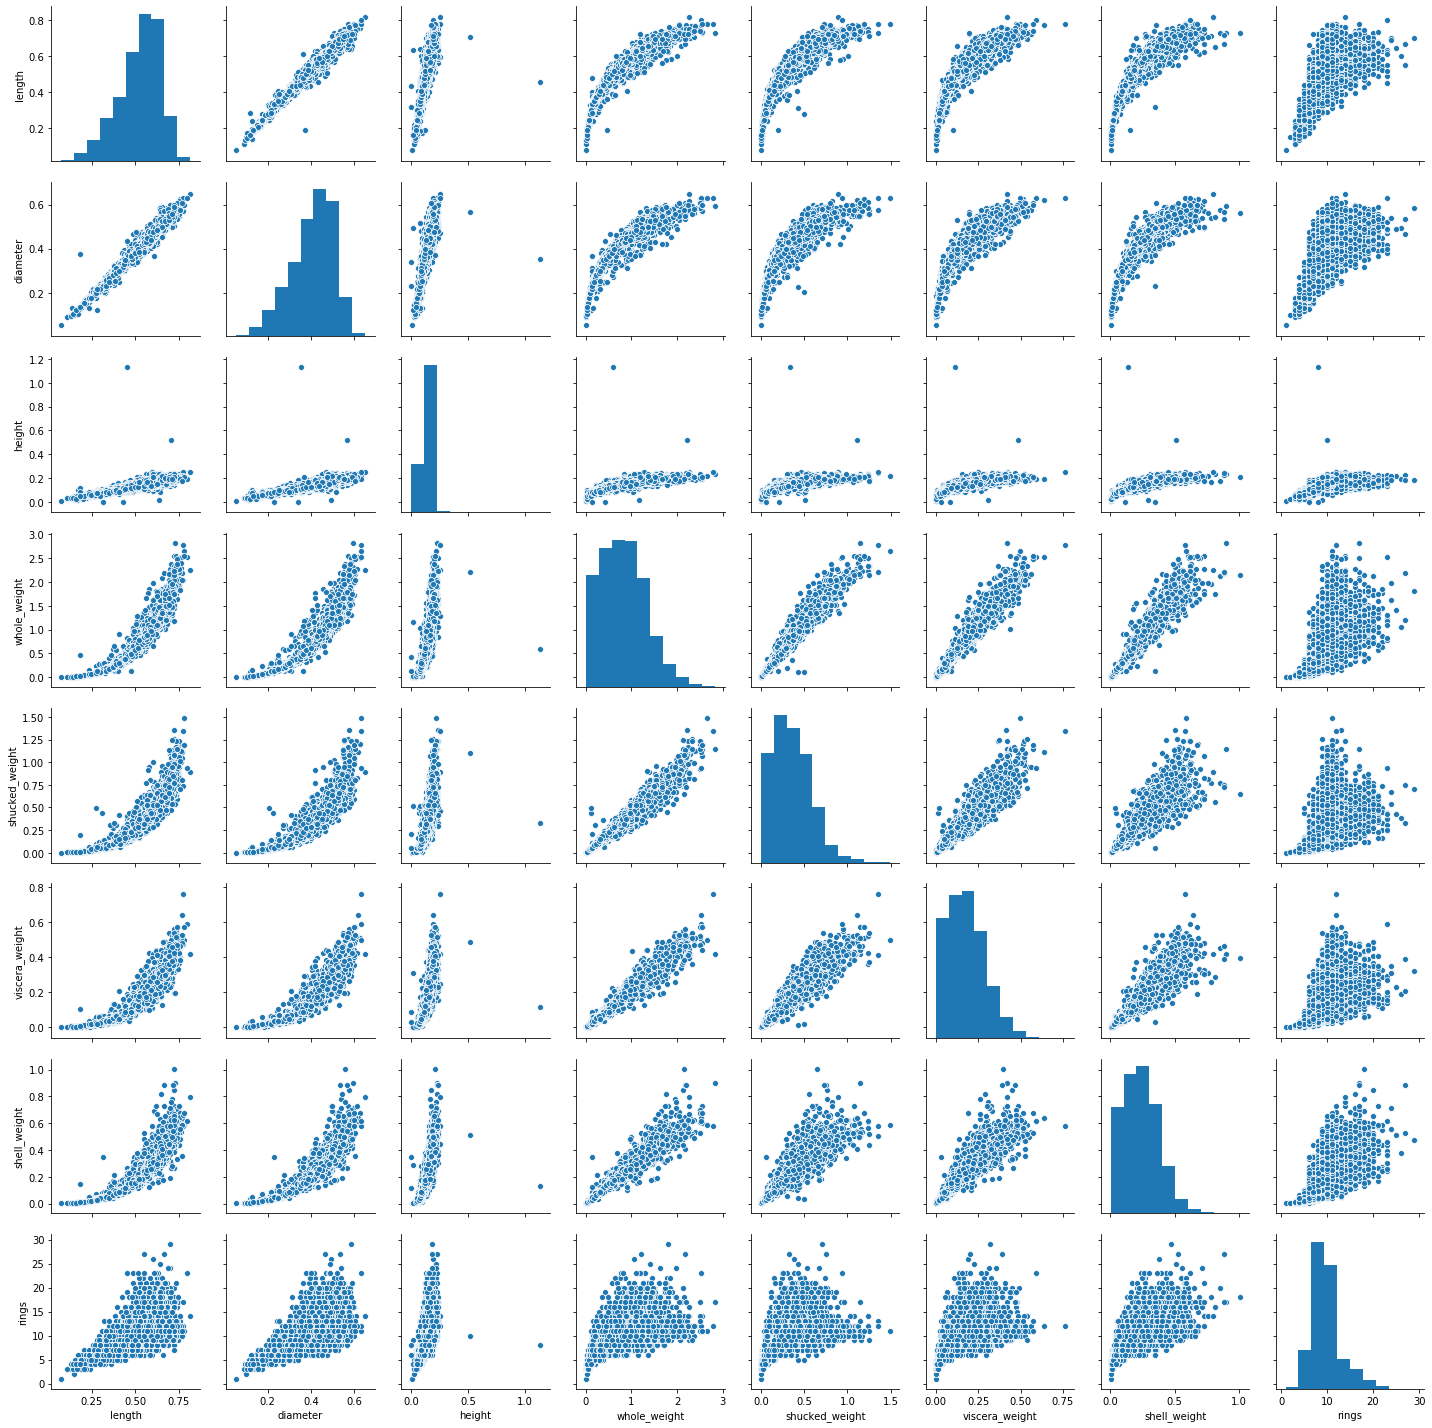

In [36]:
features = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings']
sns.pairplot(df[features]);


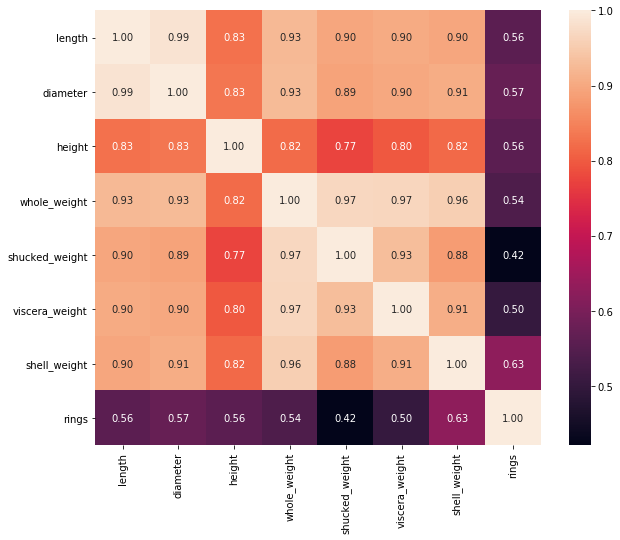

In [37]:
features = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings']

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, fmt='.02f', ax=ax)

# Data prepratation

**"The quality and quantity of data that you gather will directly determine how good your predictive model can be."**

- Select relevant features
- Clean and Missing values imputetion




<table>
  <tr>
    <th>Feature selection</th>
    <th>Filling missing values</th>
  </tr>
  <tr>
    <th><img src="http://dkopczyk.quantee.co.uk/wp-content/uploads/2018/10/feat_sel-600x265.png" /></th>
    <th><img src="https://i.stack.imgur.com/E4mhD.png" /></th>
</table>


## Select feature for analysis
Check dataset [documentation](https://github.com/creyesp/houses-project/blob/add-binder-configs/data/dataset_description.md) to choice the most interesting feature to answer our questions.

In [38]:
columns_to_analyze = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings']

## Split dataset in numerical and string variables
Pandas has a method to split dataset group by dtypes:
- **'object'**: To select strings you must use the object dtype
- **'number'**: To select all numeric types
- **'category'**: To select Pandas categorical dtypes
- **'datetime'**: To select datetimes
- **'timedelta'**: To select timedeltas

In [39]:
df_num = df[columns_to_analyze].select_dtypes(include='number')
df_obj = df[columns_to_analyze].select_dtypes(include='object')

print('Numerical columns: {}\n'.format(df_num.columns.tolist()))
print('Caterorial columns: {}'.format(df_obj.columns.tolist()))

Numerical columns: ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

Caterorial columns: ['sex']


## Missing values imputation
Some features have only 1 valid value and the rest of the values are Nan (Not a number), ex. "oficina" column. In this case we can infer that missing value is the opossite value. 
- **Look at what feature we can replace Nan values with 0**.

There are other features that nan values should be replacing with a especifi value, ex. "plantas", if a house or apartment hasn't a valid value then default value should be 1.
- **Look at what feature we can replace Nan values with especific values**.

In [ ]:
# Fill missing values with zero
fill_zero_col = [

]
df_num.loc[:, fill_zero_col] = df_num[fill_zero_col].fillna(0)

# Fill missing values with 1
df_num['plantas'].fillna(1, inplace=True)

We can infer some values of a column from other column, for example we can fill nan values in "m2_del_terreno" from "m2_edificados".
- **Select nan values from  "m2_del_terreno" and fill it with "m2_edificados".**

In [ ]:
# Fill missing value usings other columns
mask_m2_terreno = df_num['m2_del_terreno'].isna()
df_num.loc[mask_m2_terreno, 'm2_del_terreno'] = df_num.loc[mask_m2_terreno, 'm2_edificados']

Also we can use some statistic metrics to fill missing values, like mean, median, mode, etc.
- **Compute the median of "m2_edificados" and fill nan values with this result.**

In [ ]:
df_num['m2_edificados'].fillna(df_num['m2_edificados'].median(), inplace=True)

For categorical feature we can add a new category to fill missing values
- **Replace nan values with a defaul category for following feature:**
    - "barrio"
    - "disposicion"
    - "tipo_propiedad"

In [ ]:
# Fill missing categories
df_obj['barrio'].fillna('desconocido', inplace=True)
df_obj['disposicion'].fillna('otro', inplace=True)
df_obj['tipo_propiedad'].fillna('otros', inplace=True)

 ## Feature transformation
 

We can create new features applying some functions or filters to transform them and get a more informative features. Apply the following transformation:
- **Create a binary feature called "cerca_rambla" which is 1 when "distancia_al_mar" < 1000 or "vista_al_mar" is 1, in other case set it to 0.**
- **Create a feature called "m2_index" which is the ratio between "m2_edificados" and "m2_del_terreno"**
- **Create a binary feature called "es_casa" which is 1 if "tipo_propiedad" == 'casas' and 0 is "tipo_propiedad" == 'apartamentos'.**
- **Create a binary feature called "parrilero" if "extra" feature contain 'parrillero'**

In [ ]:
df_num['cerca_rambla'] = (df_num['distancia_al_mar'] <= 1000) | (df_num['vista_al_mar'] ).astype(float)

df_num['m2_index'] = df_num['m2_edificados']/df_num['m2_del_terreno']

df_num['es_casa'] = df_obj['tipo_propiedad'].map({'casas':1, 'apartamentos': 0})

df_num['parrilero'] = df_obj['extra'].str.contains('parrillero').fillna(False)


### Binning
Some variable like years or ages is an example of a feature type that might benefit from transformation into a discrete variable.

In [ ]:
range_decade = np.arange(1880, 2021, 10)
range_label = np.arange(1880, 2020, 10)
year = df['ano_de_construccion'].copy()
year[year < 1880] = 1880
year[year > 2019] = 2019
year.fillna(1951, inplace=True)
df_num['decada'] = pd.cut(year,
                    bins=range_decade,
                    labels=range_label, 
                    right=False
                   ).astype(int)
df_num['decada']
f, ax = plt.subplots()
df_num['decada'].plot.hist(bins=np.arange(1870, 2020, 10), ax=ax)

f, ax = plt.subplots()
sns.boxenplot(x='decada', y='precio', data=df_num, ax=ax)

Some categorical features are ordinal, then we can map them to a numerical values in a especific order
- **Create a dictionary with all posible values of "estado" feature and assigne a numerical value, where min value is the worse status and the max value is the best status of properties. Then map these values to a "estado" feature.**

In [ ]:
# Categorical transformation
map_status = {
    'en construccion': 3,
    'a estrenar': 3,
    'excelente estado': 3,
    'buen estado': 2,
    'reciclada': 2,
    'requiere mantenimiento': 1,
    'a reciclar': 0,
#     '': np.nan,
}
df_num['estado'] = df_obj['estado'].map(map_status)



One useful transformation is [80/20 rule or Pareto Rule](https://en.wikipedia.org/wiki/Pareto_principle), it's say that  for many events, roughly 80% of the effects come from 20% of the causes. In our case "barrio" feature has a similar behaviour.  
<img src="https://www.dansilvestre.com/wp-content/uploads/2017/12/DanSilvestre.com_-1.png" width="50%"/>

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
(df_obj['barrio'].value_counts().cumsum()/df_obj['barrio'].count()).plot(kind='bar', ax=ax)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize('x-small') 
ax.grid(axis='y')

Nominal features like "barrio" can be transformed to a numerical varable applying **ONE-HOT encoding**.
<img src="img/one-hot-encoding.png" />

- **Apply one-hot encoding on Pareto's transformation of "bario" feature and add prefix='ZN_', then assign to zona variable.**
- **Apply one-hot encoding on "disposicion" feature and add prefix='DISP_', then assign to zona disp.**

In [ ]:
zona = pd.get_dummies(handson.pareto_rule(df_obj['barrio']), prefix='ZN_',)
disp = pd.get_dummies(df_obj['disposicion'], prefix='DISP_')

Finally concatenate all new features and drop redundant 

In [ ]:
df_num_final = pd.concat([df_num, zona, disp], axis=1)
drop_col = ['distancia_al_mar', 'vista_al_mar', 'm2_del_terreno', 'ano_de_construccion']
df_num_final.drop(columns=drop_col, inplace=True)

## Apply customs filters

In [ ]:
df_num_final.quantile([0.05, 0.95])

In [ ]:
mask = (
    (df_num_final.fillna(0) >= 0).all(axis=1)
    & df_obj['tipo_propiedad'].isin(['apartamentos', 'casas'])
    & (df_num_final['decada'].between(1880, 2019))
    & (df_num_final['oficina'] != 1)
    & (df_num_final['penthouse'] != 1) 
    & (df_num_final['banos'].between(1, 3))
    & (df_num_final['dormitorios'].between(0, 5))
    & (df_num_final['garajes'].between(0, 5))
    & (df_num_final['m2_de_la_terraza'].between(0, 400))
    & (df_num_final['m2_edificados'] >= 10)
    & (df_num_final['gastos_comunes'].between(0, 5e4))
    & (df_num_final['precio'].between(1e4, 2e6))
    & (df_num_final['m2_index'].between(0, 4))
)
mask.sum()

## Drop no informative columns and drop missing row

In [ ]:
zero_std_col = df_num_final.columns[df_num_final[mask].std() == 0]
df_final = df_num_final[mask].drop(columns=zero_std_col).astype(float).dropna()


In [ ]:
handson.info(df_final)

In [ ]:
df_final.describe()

## Save ready dataset 

In [ ]:
df_final.to_csv('../data/ready/dataset_houses.csv', index=False)

## Feature Scaling
The continuous variables in our dataset are at varying scales.
This poses a problem for many popular machine learning algorithms which often use Euclidian distance between data points to make the final predictions. Standardising the scale for all continuous variables can often result in an increase in performance of machine learning models.    



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

In [ ]:
# scaler = QuantileTransformer(output_distribution='normal') 
# scaler = PowerTransformer(method='yeo-johnson')
scaler = StandardScaler()
# scaler = MinMaxScaler()

# Why Feature Selection?
- Overfitting
- Occam’s Razor: "Entities should not be multiplied without necessity."  William of Ockham
- Garbage In Garbage out: Most of the times, we will have many non-informative features.

Type of Feature Selection:

- Filter based: We specify some metric and based on that filter features. An example of such a metric could be correlation/chi-square.
- Wrapper-based: Wrapper methods consider the selection of a set of features as a search problem. Example: Recursive Feature Elimination
- Embedded: Embedded methods use algorithms that have built-in feature selection methods. For instance, Lasso and RF have their own feature selection methods.



In [ ]:
num_feats = 20
feature_name = data_set.columns.to_list()


## Filter based
Pearson correlation
We check the absolute value of the Pearson’s correlation between the target and numerical features in our dataset. We keep the top n features based on this criterion.

In [ ]:
corr = df_final.corr()['precio'].drop('precio')
high_corr = np.abs(corr) > 0.5
corr_feature = high_corr.index.tolist()
corr_support = high_corr.to_numpy()


## Recursive Feature Elimination


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_feats, step=1, verbose=5, )
rfe_selector.fit(data_set, target)
rfe_support = rfe_selector.get_support()
rfe_feature = data_set.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

## Embebed
Embedded methods use algorithms that have built-in feature selection methods.

### Lasso
For example, Lasso and RF have their own feature selection methods. Lasso Regularizer forces a lot of feature weights to be zero.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

embeded_lr_selector = SelectFromModel(Lasso(), max_features=num_feats)
embeded_lr_selector.fit(data_set, target)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = data_set.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

In [ ]:
embeded_lr_feature

### RandomForest
We can also use RandomForest to select features based on feature importance.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=10), max_features=num_feats)
embeded_rf_selector.fit(data_set, target)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = data_set.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

embeded_rf_selector = SelectFromModel(DecisionTreeRegressor(), max_features=num_feats)
embeded_rf_selector.fit(data_set, target)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = data_set.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
# from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor

lgbr=LGBMRegressor(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbr, max_features=num_feats)
embeded_lgb_selector.fit(data_set, target)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = data_set.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

In [ ]:
# put all selection together
feature_selection_df = pd.DataFrame(
    {
        'Feature':feature_name, 
        'Pearson':corr_support, 
        'RFE':rfe_support, 
        'Logistics':embeded_lr_support,
        'Random Forest':embeded_rf_support,
        'LightGBM':embeded_lgb_support
    })
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

In [ ]:
from scipy import stats

In [ ]:
stats.pointbiserialr(df_final['precio'], df_final['banos_extra'])

In [ ]:
stats.pointbiserialr(df_final['precio'], df_final['banos_extra'])

In [ ]:
def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
confusion_matrix = pd.crosstab(df_final['dormitorios'], df_final['banos'])
confusion_matrix

In [ ]:
cramer = cramers_corrected_stat(confusion_matrix)
cramer